---

# **Part I: Research Question**

## Research Question

My dataset for this data mining classification exercise includes data on an internet service provider’s current and former subscribers, with an emphasis on customer churn (whether customers are maintaining or discontinuing their subscription to the ISP’s service).  Data analysis performed on the dataset will be aimed with this research question in mind: is there a relationship between customer lifestyle, or “social” factors, and customer churn?  Lifestyle and social factors might include variables such as age, income, and marital status, among others.

---

## Objectives and Goals

Conclusions gleaned from the analysis of this data can benefit stakeholders by revealing information on which customer populations may be more likely to “churn”, or terminate their service contract with the ISP.  For a data mining exercise such as this, I will determine whether a specific classification method, random forest, can accurately classify which customers will churn based on comparing features of customers who do churn with those that do not.  Such information may be used to fuel targeted advertising campaigns, special promotional offers, and other strategies related to customer retention.

---

# **Part II: Method Justification**

## Random Forest Classifier

The random forest machine learning algorithm is regarded as one of the more accurate and robust predictive models.  This is largely due to random forest being an ensemble learning process where multiple models are used to analyze known data points.  Those models then arrive at their own decision, or "vote", after which the results are averaged to determine a more accurate prediction.  In the specific case of random forests, multiple decision tree models iterate through their own decision flows, executed on a random sampling of known data in a process called bootstrapping.  Once trained, when needed for prediction purposes they will each use their unique decision flow to arrive at a classification result.  Each of those results is taken as input by the random forest to issue a final prediction.


---

## Assumption of Random Forest

One key assumption of random forest is that it does not rely on formal distribution of data (Vishalmendekarhere, 2021).  To break this down, it means random forests are quite capable of handling many of the random elements of acquired data that other algorithms need fixed, such as outliers and missing data.  While individual decision trees within the random forest will experience their own errors, having multiple decision trees to source before issuing a prediction better insulates the encompassing algorithm from inaccuracies due to those errors.

---

## Tool Selection

All code execution was carried out via Jupyter Lab, using Python 3.  I used Python as my selected programming language due to prior familiarity and broader applications when considering programming in general.  R is a very strong and robust language tool for data analysis and statistics but finds itself somewhat limited to that niche role (Insights for Professionals, 2019).

Pictured below is a list of packages imported for the data mining operation.

In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

---

- **NumPy, Pandas, and Matplotlib**

One might consider NumPy, Pandas, and Matplotlib to be a holy trinity of Python data science, as they are likely to be present in any Python code used for data science or data analytics tasks.  NumPy is used for a plethora of mathematical calculations; Pandas is relied upon for data manipulation (and is quite compatible with NumPy), and Matplotlib is the foundation of Python's data plotting features.

- **Scikit-learn**

I used a number of modules and functions from the scikit-learn library:

- KNeighborsClassifier - used for creating a k-nearest neighbors algorithm for a classifier machine learning model
- RandomForestClassifier - used for creating a random forest algorithm for a classifier machine learning model
- train_test_split - splits a data set into train and test sets, the former used for learning how to predict, and the latter for running and comparing predictions
- GridSearchCV - a useful function for hyperparameter tuning, this will be used to determine an optimal value for n_estimators and max_depth in the random forest model
- accuracy_score, mean_squared_error - calculate the metrics by which each model's effectiveness and accuracy will be measured

---

# **Part III: Data Preparation**

## Data Preparation Goals and Data Manipulations

I would like my data to include only variables relevant to my research question, and to be clean and free of missing values and duplicate rows.  It will also be important to re-express any categorical variable types (including my target variable, "Churn") with numeric values.  My first steps will be to import the complete data set and execute functions that will give me information on its size, the data types of its variables, and a peek at the data in table form.  I will then narrow the data set to a new dataframe containing only the variables I am concerned with, and then utilize functions to determine if any null values or duplicate rows exist.

The data set variables that I will use to perform the analysis for the classification question are listed below.


|Variable|Data Type|Continuous or Categorical|Description|
|---|---|---|---|
|Area|	object	|Categorical	|Type of area customer lives in (urban, suburban, rural)|
|Job|object|Categorical|Customer's occupation|
|Children	|float64	|Continuous	|How many children live in the customer’s household|
|Age	|float64	|Continuous	|Customer’s age|
|Income	|float64	|Continuous	|Customer’s income annually|
|Marital	|object	|Categorical	|Customer’s marital status|
|Gender	|object	|Categorical	|Self-identified gender of the customer|
|Churn	|object	|Categorical	|Yes/No if customer canceled service|
|Tenure|float64	|Continuous	|Length of time in months the customer has maintained service|
|MonthlyCharge|float64	|Continuous	|Amount in dollars the customer is charged per month|
|Bandwidth_GB_Year|float64	|Continuous	|How much bandwidth the customer uses per year|

In [2]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [3]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Drops columns with no relevance to the research question
df_data = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                   'Population', 'TimeZone', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie',
                   'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                   'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [5]:
# Display dataset top 5 rows
df_data.head()

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,6.795513,172.455519,904.536110
1,Urban,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,1.156681,242.632554,800.982766
2,Urban,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,15.754144,159.947583,2054.706961
3,Suburban,Solicitor,1,48,18925.23,Married,Male,No,17.087227,119.956840,2164.579412
4,Suburban,Medical illustrator,0,83,40074.19,Separated,Male,Yes,1.670972,149.948316,271.493436


In [6]:
# Display data set number of rows and colums
df_data.shape

(10000, 11)

In [7]:
# Check data for null or missing values
df_data.isna().any()

Area                 False
Job                  False
Children             False
Age                  False
Income               False
Marital              False
Gender               False
Churn                False
Tenure               False
MonthlyCharge        False
Bandwidth_GB_Year    False
dtype: bool

In [8]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

---

I can use the describe() function to display the summary statistics for the entire dataframe, as well as each variable I'll be evaluating for inclusion.  I have selected the Churn variable as my target variable.

In [9]:
# Display summary statistics for entire dataset - continuous variables
df_data.describe()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,71.999280,290.160419,7158.981530


In [10]:
# Display summary statistics for entire dataset - categorical variables
df_data.describe(include = object)

,Area,Job,Marital,Gender,Churn
count,10000,10000,10000,10000,10000
unique,3,639,5,3,2
top,Suburban,Occupational psychologist,Divorced,Female,No
freq,3346,30,2092,5025,7350


---

Immediately I can tell there is a problem with the Job variable.  For most of the categorical variables I will be using one-hot encoding to generate their numerical equivalents, but the Job variable has far too many unique values for this to be feasible.  There may be a way to sort the jobs into categories and then use a form of label encoding, but for the purpose of this exercise I will be excluding the Job variable.

In [11]:
# Too many unique values, drop Job column
df_data = df_data.drop(['Job'], axis=1)

In [12]:
# Display summary statistics for dataset - categorical variables
df_data.describe(include = object)

,Area,Marital,Gender,Churn
count,10000,10000,10000,10000
unique,3,5,3,2
top,Suburban,Divorced,Female,No
freq,3346,2092,5025,7350


---

Now that the unique values for my categorical variables are under control, I can move forward with one-hot encoding via the Pandas get_dummies() function.  This will create new columns for each unique value for these variables, then remove the original variables from the data set.

In [13]:
# Convert categorical variables (excluding Churn) to numeric via pd.get_dummies
df_data = pd.get_dummies(df_data, columns = ['Area', 'Marital', 'Gender'], dtype = int)

---

For my target variable, Churn, I will once again perform a conversion to integer values.  Without making a modification to the code used for the other categorical variables I would end up with two columns, Churn_No and Churn_Yes.  This is not ideal, as I want a single variable used for my target, and with two columns for Churn one would be used as the target and the other for feature data.  I could use the same process I used for the other categorical variables and then simply drop the extra column, but it is easier to amend my get_dummies function to include the "drop_first = True" parameter and let the function handle that task for me.

In [14]:
# Convert categorical variables (excluding Churn) to numeric via pd.get_dummies
df_data = pd.get_dummies(df_data, columns = ['Churn'], drop_first = True, dtype = int)

---

My data manipulations are now complete, and I can once again view the info for the reduced data set, along with a preview of the contents.

In [15]:
# Display dataset info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   Tenure                 10000 non-null  float64
 4   MonthlyCharge          10000 non-null  float64
 5   Bandwidth_GB_Year      10000 non-null  float64
 6   Area_Rural             10000 non-null  int64  
 7   Area_Suburban          10000 non-null  int64  
 8   Area_Urban             10000 non-null  int64  
 9   Marital_Divorced       10000 non-null  int64  
 10  Marital_Married        10000 non-null  int64  
 11  Marital_Never Married  10000 non-null  int64  
 12  Marital_Separated      10000 non-null  int64  
 13  Marital_Widowed        10000 non-null  int64  
 14  Gender_Female          10000 non-null  int64  
 15  Gen

---

## Copy of Prepared Data Set

Below is the code used to export the prepared data set to CSV format.

In [16]:
# Export prepared dataframe to CSV
df_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/churn_clean_prepared.csv')

---

# **Part IV: Analysis**

## Splitting the Data

Below I will use the train_test_split function to split my data set into training and testing sets.  I will use a 0.25 split, which is a good rule of thumb value.  This means that 75% of my data will be used to train the random forest algorithm, and 25% of the data will be used to test the classification.  Once split, the train and test sets for both the features and the target will be exported in CSV format.

In [17]:
# Generate train/test split
y = df_data['Churn_Yes'].values
X = df_data.drop('Churn_Yes', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

In [18]:
# Create dataframes from train/test splits and export as CSV
X_train_data = pd.DataFrame(data = X_train)
X_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/X_train.csv')
X_test_data = pd.DataFrame(data = X_test)
X_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/X_test.csv')
y_train_data = pd.DataFrame(data = y_train)
y_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/y_train.csv')
y_test_data = pd.DataFrame(data = y_test)
y_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/Data-Mining---Random-Forest/Data-Mining---Random-Forest/y_test.csv')

---

## Analysis Technique

I will begin by running an initial set of predictions using the random forest classifier and recording the accuracy score and MSE.  I will start with these base parameters:

- n_estimators = 25
- max_depth = 4
- max_features = 3
- bootstrap = True
- random_state = 42

In [19]:
# Instantiate rfc
rfc = RandomForestClassifier(n_estimators = 25, max_depth = 4, max_features = 3, bootstrap = True, random_state = 42)
# Fit rfc to the training set    
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)
# Display accuracy score
print('Test set accuracy score of Random Forest: {:.4f}'.format(accuracy_score(y_test, y_pred)))
# Display auc score
print('Test set MSE of Random Forest: {:.4f}'.format(mean_squared_error(y_test, y_pred)))

Test set accuracy score of Random Forest: 0.8328
Test set MSE of Random Forest: 0.1672


---

The scores for the model look respectable as is.  With GridSearchCV I can attempt to better tune the model using some different parameters in hopes of achieving some better results.

In [20]:
# Define parameters
parameters = { 
    'n_estimators': [15,25,35],
    'max_depth': [3,5,7],
    'max_features': [3,5,7],
    'bootstrap': [True,False],
    'random_state' : [42]
}
# Grid Search function
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
CV_rfc.fit(X_train, y_train)
# print best parameters
print(CV_rfc.best_params_)

{'bootstrap': True, 'max_depth': 7, 'max_features': 7, 'n_estimators': 35, 'random_state': 42}


In [21]:
# Instantiate rfc
rfc = RandomForestClassifier(n_estimators = 25, max_depth = 7, max_features = 7, bootstrap = True, random_state = 42)
# Fit rfc to the training set    
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)
# Display accuracy score
print('Test set accuracy score of Random Forest: {:.4f}'.format(accuracy_score(y_test, y_pred)))
# Display auc score
print('Test set MSE of Random Forest: {:.4f}'.format(mean_squared_error(y_test, y_pred)))

Test set accuracy score of Random Forest: 0.8440
Test set MSE of Random Forest: 0.1560


---

The scores do show improvement after parameter tuning.  I can now compare the model's performance with that of another popular classification model, k-nearest neighbors.

In [22]:
# Define knn
knn = KNeighborsClassifier(n_neighbors=25)
# fit knn to model
knn.fit(X_train, y_train)
# Predict the test set labels
y_pred = knn.predict(X_test)
# predict probabilities
pred_prob = knn.predict_proba(X_test)
# Display accuracy score
print('Test set accuracy score of knn: {:.4f}'.format(accuracy_score(y_test, y_pred)))
# Display auc score
print('Test set MSE of knn: {:.4f}'.format(mean_squared_error(y_test, y_pred)))

Test set accuracy score of knn: 0.7360
Test set MSE of knn: 0.2640


---

The random forest model appears to be an improvement over k-nearest neighbors at this early stage.  To further analyze what the predictions can tell me about the data, I can plot which features from the data are having the greatest impact on predictions.

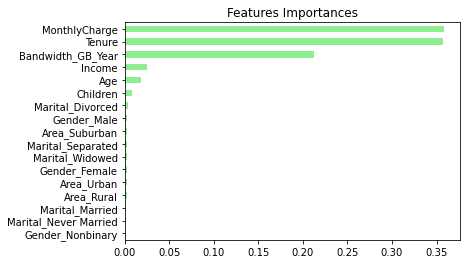

In [23]:
X_data = pd.DataFrame(df_data.drop('Churn_Yes', axis=1))
# Create a pd.Series of features importances
importances = pd.Series(data=rfc.feature_importances_,
                        index= X_data.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

---

# **Part V: Data Summary and Implications**

## Summary of Findings

The random forest classification algorithm resulted in an accuracy score of 0.8440 and a mean squared error of 0.1560.  These two measurement compliment each other and indicate a high chance of successfully classifying an unknown data point as churned or not churned.  Both scores exceed those I saw when comparing with another classification model, k-nearest neighbors, which is congruent with the accepted opinion that random forests are one of the most accurate machine learning algorithms.

Data also reflected that the strongest predictors of churn where MonthlyCharge, Tenure, and Bandwidth_GB_Year.

One limitation of random forests is that it is sometimes necessary to use a high number of estimators in order to achieve desired accuracy, which causes the length of time it takes to train these models to increase dramatically.  Not much can be done to mitigate against this as it is a product of the algorithm's nature of using many smaller algorithms together in order to arrive at its conclusions.


---

## Recommended Course of Action

The results of my analysis indicate an algorithm similar to mine could reliably predict which customers are in danger of churning.  It may be beneficial to offer those customers classified in this way special promotional rates or product enhancements to entice them into remaining customers.

---

# **Part VI: Demonstration**

**Panopto Video Recording**

A link for the Panopto video has been provided separately.  The demonstration includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

---

# **Web Sources**

https://towardsdatascience.com/random-forest-regression-5f605132d19d

https://towardsdatascience.com/random-forest-classification-678e551462f5



---

# **References**


Insights for Professionals. (2019, February 26). *5 Niche Programming Languages (And Why They're Underrated).* https://www.insightsforprofessionals.com/it/software/niche-programming-languages


Vishalmendekarhere.  (2021, January 17).  *It’s all about Assumptions, Pros & Cons.*  Medium.  https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d

